# Rumor Spreading
主要思想：谣言在人群中的传播模型建立在DTMC（Discrete Time Markov Chain）上。人群主要分为3类，第一类人不知道谣言，第二类人积极传播谣言，第三类人知道谣言但消极传播。每个人基于不同情况会在三类人之间转变，比如某个人身边有一定数量的传播者，那么他会以一定概率转变为传播者；某个传播者身边有一定数量的人已经知道谣言，那么他会以一定概率失去传播兴趣，转为第三类人。所有事件的发生基于概率。
对于同样的，在3天后，真实信息开始传播，同样使用该传播模型，模拟真实信息在人群中的覆盖率。

## 1 Background Knowledge(From wikipedia)

### 1.1 DK Model
A standard model of rumor spreading was introduced by Daley and Kendall,[[Stochastic rumors]](https://en.wikipedia.org/wiki/Rumor_spread_in_social_network#cite_note-1) which is called DK model. Assume there are N people in total. And those people in the network are categorized into three groups: **ignorants**, **spreaders** and **stiflers**, which are denoted as S, I, and R respectively hereinafter:

- S: people who are ignorant of the rumor;
- I: people who actively spread the rumor;
- R: people who have heard the rumor, but no longer are interested in spreading it.

The rumor is propagated through the population by pair-wise contacts between spreaders and others in the population. Any spreader involved in a pair-wise meeting attempts to “infect” the other individual with the rumor. In the case this other individual is an ignorant, he or she becomes a spreader. In the other two cases, either one or both of those involved in the meeting learn that the rumor is known and decided not to tell the rumor anymore, thereby turning into satiflers.

### 1.2 MK Model(Variant of DK Model)
人群总数为$N=I+S+R$

传播者遇到不知道谣言的人，以概率$\alpha$变成两个传播者
$$
S+I\stackrel{\alpha}{\longrightarrow}2I
$$
传播者遇到传播者，其中之一以概率$\beta$变成消极传播者
$$
I+I\stackrel{\beta}{\longrightarrow}I+R
$$
传播者遇到消极传播者，以概率$\beta$变成消极传播者
$$
I+R\stackrel{\beta}{\longrightarrow}2R
$$
其余理论公式可在论文或维基中找到，见Reference

### 1.3 DTMC
马尔可夫链形式：$\{...S_0,I_0,R_0,S_1,I_1,R_1,...,S_t,I_t,R_t...\}$，代表每个时刻三类人的数量
每个人的状态转移矩阵与其代表的节点的度有关。这里假定人群的连接是无向图（即认识是相互的，不存在a认识b，b不认识a的情况）。

## 2 Experiment
### 2.1 宏观角度（适用于大量数据）
假设有N个人，每个人平均认识n个人，S，I，R代表三类人在人群中占的总比例。那么$S+I+R=1$。这里假定听到谣言即变成传播者，

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def marco_SIR(N, mean_degree, alpha=1, beta=0.2):
    s_list, i_list, r_list, t_list = [], [], [], []
    t = 0.
    t_tmp = 0.
    
    s_p = 1. - eps # 不知道谣言的人
    i_p = eps      # 传播者
    r_p = 0.       # 消极传播者
    
    while True:
        w_si = (N * i_p * mean_degree) * s_p # 不知道谣言转变为传播者
        w_ir = (N * i_p * mean_degree) * (i_p + r_p) * beta     # 知道谣言转变为消极传播者
        tau = 1. / (w_si + w_ir) #完成上述转变需要的预估时间，转变越多需要的时间越短（爆炸效应）
        
        t += tau
        t_tmp += tau
        reaction = list(np.random.multinomial(1, tau * np.array([w_si, w_ir]))).index(1)
#         print(reaction)
        if reaction:
            value = min(eps, i_p)
            i_p -= value
            r_p += value
        else:
            value = min(eps, s_p)
            s_p -= value
            i_p += value
        if i_p < eps:
            break
        if t_tmp > 0.05:
            t_tmp -= 0.05
            i_list.append(i_p)
            s_list.append(s_p)
            r_list.append(r_p)
            t_list.append(t)
    i_list.append(i_p)
    s_list.append(s_p)
    r_list.append(r_p)
    t_list.append(t)
    return t_list, i_list, s_list, r_list

N=10000 mean_degree= 6 beta=0.2


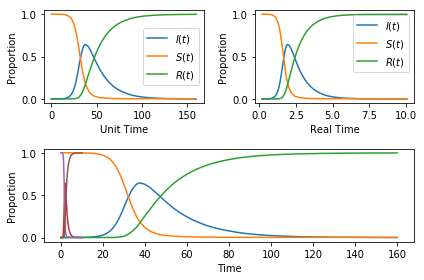

N=10000 mean_degree= 6 beta=0.2


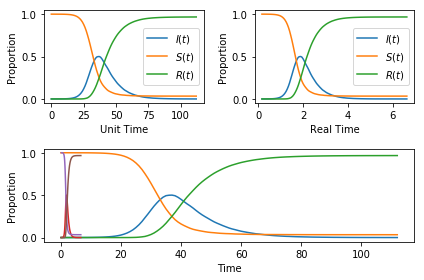

N=10000 mean_degree= 6 beta=0.2


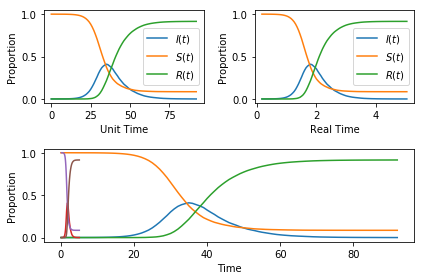

N=10000 mean_degree= 6 beta=0.2


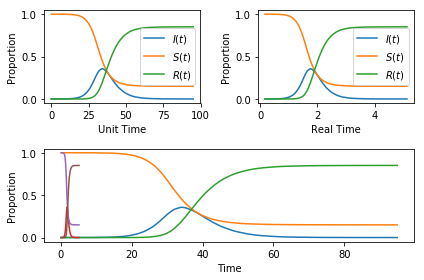

In [49]:
# plot
def marco_plot(t_v, i_v, s_v, r_v, N, mean_degree, beta):
    plt.title("N={} mean_degree= {} beta={}".format(str(N), str(mean_degree), str(beta)))
    plt.subplot(221)
    plt.xlabel("Unit Time")
    plt.ylabel("Proportion")
    plt.plot([t for t in range(len(i_v))], i_v, label="$I(t)$")
    plt.plot([t for t in range(len(s_v))], s_v, label="$S(t)$")
    plt.plot([t for t in range(len(r_v))], r_v, label="$R(t)$")
    plt.legend()

    plt.subplot(222)
    plt.xlabel("Real Time")
    plt.ylabel("Proportion")
    plt.plot(t_v, i_v, label="$I(t)$")
    plt.plot(t_v, s_v, label="$S(t)$")
    plt.plot(t_v, r_v, label="$R(t)$")
    plt.legend()


    plt.subplot(212)
    plt.xlabel("Time")
    plt.ylabel("Proportion")
    plt.plot([t for t in range(len(i_v))], i_v, label="$I(t)$")
    plt.plot([t for t in range(len(s_v))], s_v, label="$S(t)$")
    plt.plot([t for t in range(len(r_v))], r_v, label="$R(t)$")
    plt.plot(t_v, i_v, label="$I(t)$")
    plt.plot(t_v, s_v, label="$S(t)$")
    plt.plot(t_v, r_v, label="$R(t)$")
    plt.tight_layout()
    plt.show()

N = 10000   # 假设人数为10000
eps = 1./N  # 最初传播人数为1个
mean_degree = 6
beta = 0.2
t_v, i_v, s_v, r_v = marco_SIR(mean_degree, N, beta = 0.2)
print("N={} mean_degree= {} beta={}".format(str(N), str(mean_degree), str(beta)))
marco_plot(t_v, i_v, s_v, r_v, N, mean_degree, beta)
t_v, i_v, s_v, r_v = marco_SIR(mean_degree, N, beta = 0.4)
print("N={} mean_degree= {} beta={}".format(str(N), str(mean_degree), str(beta)))
marco_plot(t_v, i_v, s_v, r_v, N, mean_degree, beta)
t_v, i_v, s_v, r_v = marco_SIR(mean_degree, N, beta = 0.6)
print("N={} mean_degree= {} beta={}".format(str(N), str(mean_degree), str(beta)))
marco_plot(t_v, i_v, s_v, r_v, N, mean_degree, beta)
print("N={} mean_degree= {} beta={}".format(str(N), str(mean_degree), str(beta)))
t_v, i_v, s_v, r_v = marco_SIR(mean_degree, N, beta = 0.8)
marco_plot(t_v, i_v, s_v, r_v, N, mean_degree, beta)

## References

1. [wikipedia-Rumor spread in social network](https://en.wikipedia.org/wiki/Rumor_spread_in_social_network)